In [2]:
import datetime
import time
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
from matplotlib.cm import Greys
import matplotlib.dates as mdt
import seaborn as sns
import scipy.stats as ss
p1 = Path.cwd() / 'back_data'

In [4]:
# matplotlib에게 notebook에서 그림을 그리도록 지시
%matplotlib inline
# Jupyter Notebook 상에서 한글이 깨지지 않고 나오도록 조치
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# config 설정으로 고화질 도표 생성
%config InlineBackend.figure_format = 'svg'

In [5]:
# pandas는 plot 속성(혹은 plot() 메서드)을 호출하여 도식화 가능 -> 내부적으로 matplotlib 함수 호출해 도면
# seaborn은 정돈된 데이터와 작업, matplotlib은 집계된 데이터에 작동
# seaborn은 도식화 함수에서 pandas DataFrame 객체를 허용

In [6]:
# matplotlib은 객체의 계층 구조를 사용해 출력 -> Figure > Axes(axis와는 별개) / axis는 x, y 축 나타내기

[(0.0, 10.0),
 (-3.0, 8.0),
 Text(0.5, 0, 'X axis'),
 Text(0, 0.5, 'Y axis'),
 Text(0.5, 1.0, 'Line Plot')]

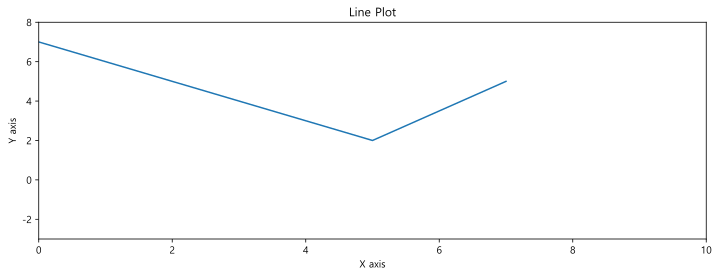

In [12]:
# subplots() 함수 사용하여 상태 저장 및 객체지향 혼용
x = [-3, 5, 7]
y = [10, 2, 5]
fig, ax = plt.subplots(figsize=(12, 4))
# ax라는 Axes 객체에 x, y에 대한 선 그래프 그리기
ax.plot(x, y)
# set() 메서드 활용하여 각종 설정 가능
ax.set(xlim=(0, 10), ylim=(-3, 8), xlabel='X axis', ylabel='Y axis', title='Line Plot')

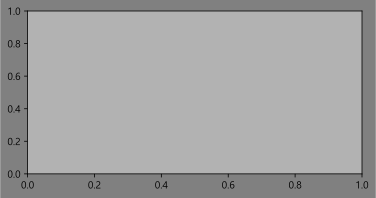

In [23]:
fig, ax = plt.subplots(1, 1)
# fig의 get_size_inches()로 확인, set_size_inches() 메서드로 변경 -> 괄호 안에 숫자를 직접 전달
fig.set_size_inches(6, 3), fig.axes
# set_facecolor() 활용해 색상 변경(따옴표는 꼭 들어가야) -> fig, ax 공통
fig.set_facecolor('0.5')
ax.set_facecolor('0.7')

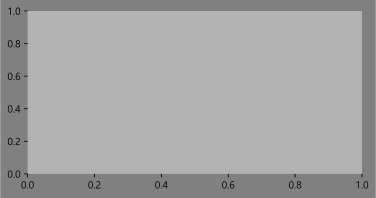

In [31]:
# spines 속성을 활용해 spine에 접근 가능
spines = ax.spines
# spines['left'] 형식으로 접근하여 변경 가능
for direction in ['right', 'left', 'top', 'bottom']:
    # set_linewidth(), set_visible() 메서드 등 활용
    spines[direction].set_visible(False)
fig

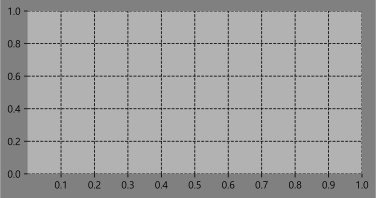

In [46]:
# set_xticks() 메서드, set_xticklabels() 메서드 등을 활용해 x축 내용 변경
# tick_params() 메서드를 활용할 수도
ax.set_xticks(np.arange(0.1, 1.1, 0.1))
# grid() 메서드 활용 가능(set, get 형식이 아닌 점 중요) -> visible(과거 b), lindwidth, linestyle, color 파라미터 이용하여 설정
# 혹은 grid() 메서드에 axis='x', axis='y' 인자 전달 가능
ax.grid(color='black', linestyle='--')
fig

In [47]:
alta = pd.read_csv(p1 / 'alta-noaa-1980-2019.csv')
alta.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# 2018-2019 데이터 확인
data = (alta
.assign(DATE=pd.to_datetime(alta['DATE']))
.set_index('DATE')
.loc['2018-09':'2019-08']
['SNWD']
# 누락된 데이터가 있는 경우 시계열에 따라 내삽(interpolate) 가능 -> interpolate() 메서드 이용, limit_direction='both' 인자 전달
.interpolate(limit_direction='both')
)
data.tail()

DATE
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, dtype: float64

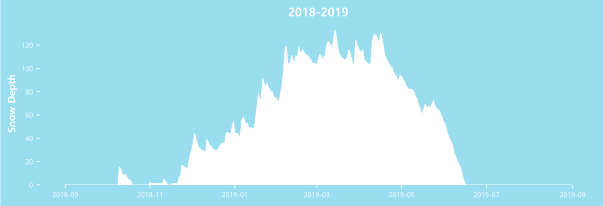

In [62]:
# 색상 설정
blue = '#99ddee'
white = '#ffffff'
# pyplot의 subplots() 함수 이용하여 fig, ax 객체 생성 -> facecolor 파라미터 통해 fig 색상 변경
fig, ax = plt.subplots(figsize=(10, 3), facecolor=blue)
# ax의 색도 blue로 변경
ax.set_facecolor(blue)
# spines 속성 활용하여 모든 spine들의 색상을 보이지 않도록 변경
spines = ax.spines
for direction in ['right', 'left', 'top', 'bottom']:
    spines[direction].set_visible(False)
# tick_params() 메서드 활용 -> axis='both' 인자 전달하여 x, y축 모두 적용, labelsize 파라미터도 활용 가능
ax.tick_params(axis='both', colors=white, labelsize=7)
# set_ylabel() 메서드 활용하여 y축의 라벨 작성 -> fontweight 파라미터 활용 가능
ax.set_ylabel('Snow Depth', color=white, fontweight='bold')
# set_title() 메서드 활용하여 axes의 제목 지정
ax.set_title('2018-2019', color=white, fontweight='bold')
# stackplot() 메서드를 이용하여 채우는 선 그래프 삽입 -> x축과 y축에 들어갈 인자를 키워드 없이 전달
ax.stackplot(data.index, data, color=white)